# Jupyter 101

An Introduction to Jupyter Notebooks and JupyterLab



## Overview

Jupyter Notebook is a web-based interactive computational environment for creating and sharing notebook documents.

The name is a reference to the three core supported programming languages: Julia, Python, and R.

This notebook will guide you through the basics of Jupyter Notebooks and JupyterLab.



## Contents

- Introduction
  - Jupyter Notebooks vs. JupyterLab
  - Use cases
- Setup
  - Local
  - Docker
  - Binder
- Features
  - Markdown cells
  - Code cells
  - Widgets
  - Visualizations
  - Console and terminal
  - Extensions
- Best practices
  - Organization
  - Version control
  - Collaboration



## Introduction

Jupyter is an open-source project originating from [IPython](https://ipython.org) and evolved to support interactive computing across multiple programming languages.

### Jupyter Notebooks vs. JupyterLab

Jupyter Notebooks are web-based documents that allow combining documentation, live code, various visualizations, and more. They are an excellent tool for exploratory data analysis, prototyping, training, and sharing.

JupyterLab extends the capabilities of Jupyter Notebooks into a flexible and extensible development environment that supports multiple tabs, interactive widgets, and integration with various tools and extensions.

### Use Cases

Jupyter has a wide range of applications across different fields.

It is widely used in **data science** for data cleaning, transformation, and visualization. The ability to combine code and visual output in a single document enhances the exploratory nature of data science, allowing data scientists to document their workflows.

In **machine learning** Jupyter is used for building, training, and evaluating models, providing an interactive platform for experimenting with different algorithms and parameters.

Jupyter has become a popular tool in **education**, particularly for teaching programming and scientific computing: its interactive nature allows students to run code and see results immediately, and it enables educators to create and distribute notebooks including both instructional content and exercises.



## Setup

If you have already read the README.md file, you may skip this cell.

### Local

Install Jupyter Notebook as explained [here](https://jupyter.org/install).

Clone this repo,

```bash
git clone https://github.com/fabioscagliola/Jupyter101.git
```

then open the `Jupyter101.ipynb` notebook,

```bash
jupyter notebook Jupyter101/Jupyter101.ipynb
```

and let us take it from there.

### Docker

This repo contains everything you need to run JupyterLab in a Docker container.

Spin up the container,

```bash
docker compose up
```

and then navigate to [http://localhost:8888](http://localhost:8888).

### Binder

You may as well host this repo in the cloud using Binder.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/fabioscagliola/Jupyter101.git/HEAD)



## Features

Let us delve into some of the key features of Jupyter Notebooks and JupyterLab, exploring how each feature facilitates various tasks in data science, machine learning, education, and more.



### Markdown cells

Markdown cells in Jupyter Notebooks allow incorporating formatted text, links, tables, images, and even LaTeX formulas.

For example, here is the a picture of the Lagrangian of the Standard Model of particle physics from a [postcard](https://visit.cern/node/612) I bought at CERN.

![Lagrangian of the Standard Model of particle physics](Lagrangian.png)

And here is the Standard Model formula.

$$
\begin{align*}
\mathcal{L}&=-\frac{1}{4}\,{{F}_{\mu \nu}}{{F}^{\mu \nu}}\\
&+\text{i}\bar{\psi}{\not D}\psi+\text{h}.\text{c}.\\
&+{{\psi}_{i}}{{y}_{ij}}{{\psi}_{j}}\phi+\text{h}.\text{c}.\\
&+|{{D}_{\mu}}\phi {{|}^{2}}-V\left(\phi \right)
\end{align*}
$$



## Code cells

Code cells are where we write and execute code.

The following cell contains some Python code that prints the ninth number in the Fibonacci sequence using a recursive function, not efficient for large numbers.



In [1]:
def fibonacci(number):
    if number > 1:
        return fibonacci(number - 1) + fibonacci(number - 2)
    return number

print(fibonacci(9))

34


## Widgets

Widgets allow creating interactive elements in our notebook.

Let us use a slider widget to adjust a parameter and see its effect on a plot.



In [2]:
import ipywidgets
import matplotlib
import numpy

def sinusoid(f):
    x = numpy.linspace(0, 2 * numpy.pi, 512)
    y = numpy.sin(f * x)
    matplotlib.pyplot.figure(figsize=(16, 9))
    matplotlib.pyplot.plot(x, y)
    matplotlib.pyplot.title('f = {:.2f}'.format(f))
    matplotlib.pyplot.xlabel('x')
    matplotlib.pyplot.ylabel('y = sin(f * x)')
    matplotlib.pyplot.show()

slider = ipywidgets.FloatSlider(min=1, max=10, step=0.1, value=1, description='f')

ipywidgets.interact(sinusoid, f=slider);

interactive(children=(FloatSlider(value=1.0, description='f', max=10.0, min=1.0), Output()), _dom_classes=('wi…

## Visualizations

Jupyter Notebooks support a variety of visualization libraries.

The sinusoid above is rendered using the popular [matplotlib](https://matplotlib.org) library.

Let us now try the [ipyvolume](https://github.com/widgetti/ipyvolume) library, which is specifically designed for interactive 3D visualizations, to render the solution of the Lorenz attractor for σ = 10, ρ = 28, and β = 8/3.



In [3]:
import ipyvolume
import numpy

def lorenz(x, y, z, s=10, r=28, b=8/3):
    dx = s * (y - x)
    dy = x * (r - z) - y
    dz = x * y - b * z
    return dx, dy, dz

dt = 0.01
iterations = 10000

data = numpy.empty((iterations, 3))

x, y, z = 1, 1, 1

for i in range(iterations):
    dx, dy, dz = lorenz(x, y, z)
    x += dx * dt
    y += dy * dt
    z += dz * dt
    data[i] = x, y, z

ipyvolume.pylab.figure(width=1280, height=720, controls=False)
ipyvolume.pylab.plot(*data.T)
ipyvolume.pylab.show()

# TODO: Hide the controls

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

## Console and terminal

Besides the rich interface for working with notebooks, JupyterLab also includes support for a console and a terminal.

### Console

The console allows you to execute code interactively, similar to a Jupyter Notebook but without the need for cells.

### Terminal

The terminal provides full access to the system shell, allowing you to run any command you would normally run in a standalone terminal application.



## Extensions

Extensions in JupyterLab extend the capabilities of the core application.

Several extensions exist: integration tools, productivity tools, UI enhancements, theming, and more.

For example, [jupyterlab-git](https://github.com/jupyterlab/jupyterlab-git) is a Git extension for JupyterLab.

Ensure the extension manager is enabled by checking **Settings > Enable Extensions Manager**.

And then browse and manage extensions using the **Extensions Manager** or the terminal.

Use the following command to list the installed extensions.

```bash
jupyter server extension list
```



## Exploratory data analysis

Let us use the [pandas](https://pandas.pydata.org) library to perform some exploratory data analysis on how my music performed on Spotify in 2023 – beware: we are entering the realm of big data! :)



In [4]:
import matplotlib
import pandas

data = pandas.read_csv('data.csv')
data.head()

,Date,City,State,Country Code,Zip,Units,Album,Song,Artist,Song ISRC,Album UPC,Release Type,Transaction Type,Provider
0,2023-01-04,NaN,NaN,Switzerland,NaN,2,Proposed Tracks for Unproduced Movies,Introspect,Nothence,TCADY1884500,'859729632630',Album,Stream,spotify
1,2023-01-04,NaN,NaN,Switzerland,NaN,1,Proposed Tracks for Unproduced Movies,Projection,Nothence,TCADY1884502,'859729632630',Album,Stream,spotify
2,2023-01-04,NaN,NaN,Switzerland,NaN,1,Proposed Tracks for Unproduced Movies,How It Should Have Ended,Nothence,TCADY1884503,'859729632630',Album,Stream,spotify
3,2023-01-04,NaN,NaN,Switzerland,NaN,1,Proposed Tracks for Unproduced Movies,The Essence of Nothing,Nothence,TCADY1884505,'859729632630',Album,Stream,spotify
4,2023-01-04,NaN,NaN,Switzerland,NaN,1,Proposed Tracks for Unproduced Movies,Whose Life Is This I Am Living and Leaving Beh...,Nothence,TCADY1884506,'859729632630',Album,Stream,spotify


Perform some aggregations.



In [5]:
tracks = data.groupby('Song')['Units'].sum().sort_values(ascending=False).reset_index()
countries = data.groupby('Country Code')['Units'].sum().sort_values(ascending=False).reset_index()

And then use the [matplotlib](https://matplotlib.org) library once again to display some charts.



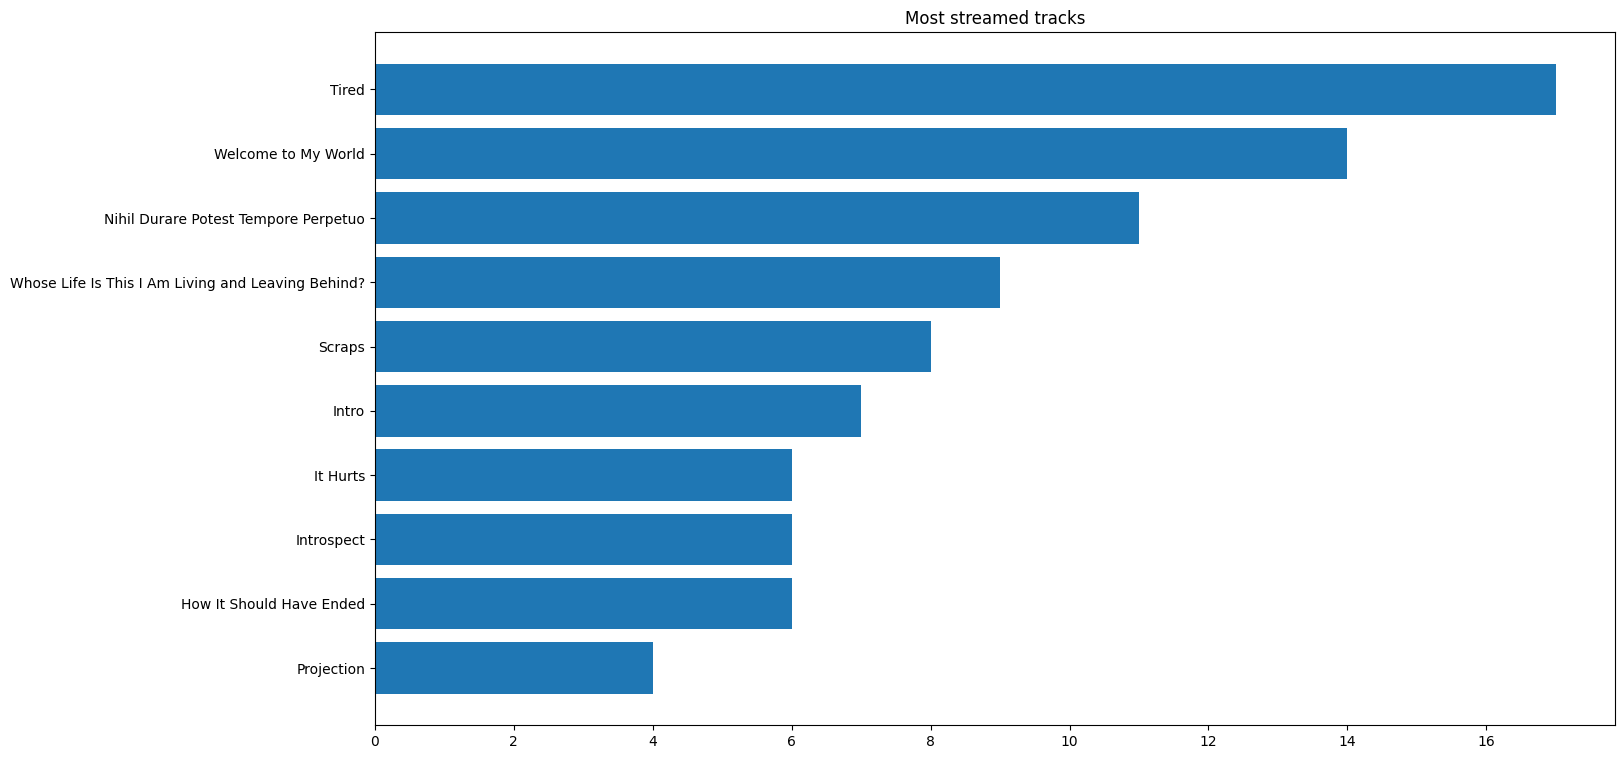

In [6]:
matplotlib.pyplot.figure(figsize=(16, 9))
matplotlib.pyplot.barh(tracks['Song'][:10], tracks['Units'][:10])
matplotlib.pyplot.gca().invert_yaxis()
matplotlib.pyplot.title('Most streamed tracks')
matplotlib.pyplot.show()

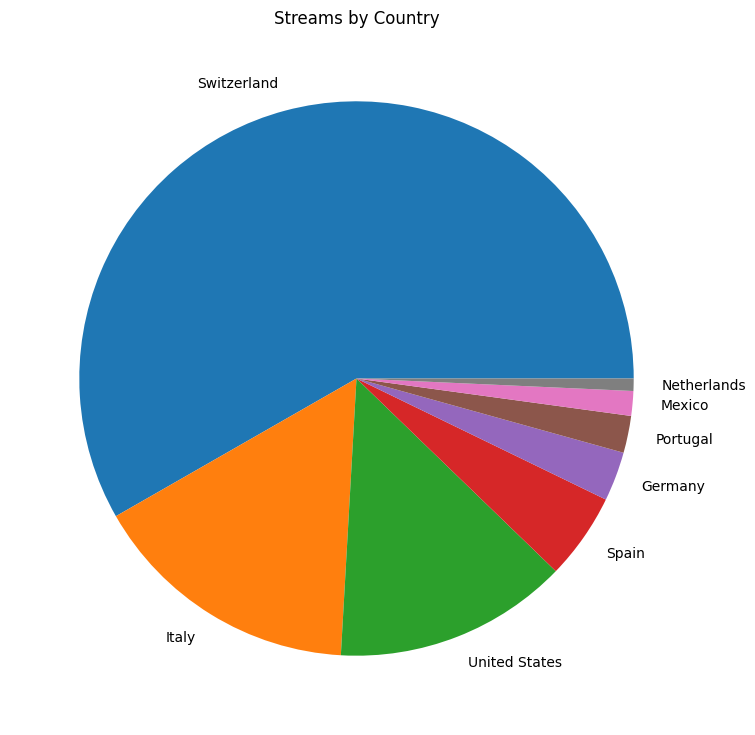

In [7]:
matplotlib.pyplot.figure(figsize=(16, 9))
matplotlib.pyplot.pie(countries['Units'][:10], labels=countries['Country Code'][:10])
matplotlib.pyplot.title('Streams by Country')
matplotlib.pyplot.show()